# Analysis Of McDonalds Review Dataset

Importing Libraries

In [1]:
import pandas as pd

In [3]:
mcd=pd.read_csv('C:/Users/kgpr/OneDrive/Desktop/McDonalds.csv',header=0,encoding = 'unicode_escape')

Shape of the dataset

In [4]:
mcd.shape

(1525, 3)

Sample of the Dataset

In [5]:
mcd.head()

,policies_violated,city,review
0,RudeService\rOrderProblem\rFilthy,Atlanta,"I'm not a huge mcds lover, but I've been to be..."
1,RudeService,Atlanta,Terrible customer service. Î¾I came in at 9:30...
2,SlowService\rOrderProblem,Atlanta,"First they ""lost"" my order, actually they gave..."
3,na,Atlanta,I see I'm not the only one giving 1 star. Only...
4,RudeService,Atlanta,"Well, it's McDonald's, so you know what the fo..."


Checking No.of words

In [10]:
mcd['word_count'] = mcd['review'].apply(lambda x: len(str(x).split(" ")))
mcd[['review','word_count']].head()


,review,word_count
0,"I'm not a huge mcds lover, but I've been to be...",50
1,Terrible customer service. Î¾I came in at 9:30...,82
2,"First they ""lost"" my order, actually they gave...",158
3,I see I'm not the only one giving 1 star. Only...,24
4,"Well, it's McDonald's, so you know what the fo...",148


Average Words Length

In [9]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

mcd['avg_word'] = mcd['review'].apply(lambda x: avg_word(x))
mcd[['review','avg_word']].head()


,review,avg_word
0,"I'm not a huge mcds lover, but I've been to be...",4.220000
1,Terrible customer service. Î¾I came in at 9:30...,4.451220
2,"First they ""lost"" my order, actually they gave...",4.449367
3,I see I'm not the only one giving 1 star. Only...,3.500000
4,"Well, it's McDonald's, so you know what the fo...",4.439189


In [11]:
from nltk.corpus import stopwords

Stopwords Count

In [12]:
stop = stopwords.words('english')

mcd['stopwords'] = mcd['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
mcd[['review','stopwords']].head()

,review,stopwords
0,"I'm not a huge mcds lover, but I've been to be...",19
1,Terrible customer service. Î¾I came in at 9:30...,33
2,"First they ""lost"" my order, actually they gave...",76
3,I see I'm not the only one giving 1 star. Only...,10
4,"Well, it's McDonald's, so you know what the fo...",60


Special Characters

In [13]:
mcd['hastags'] = mcd['review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
mcd[['review','hastags']].head()

,review,hastags
0,"I'm not a huge mcds lover, but I've been to be...",0
1,Terrible customer service. Î¾I came in at 9:30...,0
2,"First they ""lost"" my order, actually they gave...",0
3,I see I'm not the only one giving 1 star. Only...,0
4,"Well, it's McDonald's, so you know what the fo...",0


Numerics in Sentences

In [14]:
mcd['numerics'] = mcd['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
mcd[['review','numerics']].head()

,review,numerics
0,"I'm not a huge mcds lover, but I've been to be...",0
1,Terrible customer service. Î¾I came in at 9:30...,1
2,"First they ""lost"" my order, actually they gave...",2
3,I see I'm not the only one giving 1 star. Only...,1
4,"Well, it's McDonald's, so you know what the fo...",1


Uppercase Words Count

In [15]:
mcd['upper'] = mcd['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
mcd[['review','upper']].head()

,review,upper
0,"I'm not a huge mcds lover, but I've been to be...",0
1,Terrible customer service. Î¾I came in at 9:30...,4
2,"First they ""lost"" my order, actually they gave...",8
3,I see I'm not the only one giving 1 star. Only...,2
4,"Well, it's McDonald's, so you know what the fo...",5


### Basic Preprocessing

Lowercase 

In [16]:
mcd['review'] = mcd['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mcd['review'].head()

0    i'm not a huge mcds lover, but i've been to be...
1    terrible customer service. î¾i came in at 9:30...
2    first they "lost" my order, actually they gave...
3    i see i'm not the only one giving 1 star. only...
4    well, it's mcdonald's, so you know what the fo...
Name: review, dtype: object

Remove Punctuation

In [18]:
mcd['review'] = mcd['review'].str.replace('[^\w\s]','')
mcd['review'].head(30)

0     im not a huge mcds lover but ive been to bette...
1     terrible customer service î¾i came in at 930pm...
2     first they lost my order actually they gave it...
3     i see im not the only one giving 1 star only b...
4     well its mcdonalds so you know what the food i...
5     this has to be one of the worst and slowest mc...
6     im not crazy about this mcdonalds î¾this is pr...
7     one star and im beng kind i blame management l...
8     never been upset about any fast food drive thr...
9     this mcdonalds has gotten much better usually ...
10    lets start here only reason i came into mcdona...
11    other businesses throughout metro atlanta open...
12    the drive thru makes them lost a star since my...
13    believe it or not this used to be q really goo...
14    as the previous yelpers have already stated th...
15    25 minutes in drive through line gunshots from...
16    super slow service foods terrible like its bee...
17    slowslowslow î¾dont go here if you have a 

Stop Word Removal

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
mcd['review'] = mcd['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
mcd['review'].head()

0    im huge mcds lover ive better ones far worst o...
1    terrible customer service î¾i came 930pm stood...
2    first lost order actually gave someone one els...
3      see im one giving 1 star 25 star thats need say
4    well mcdonalds know food î¾this review reflect...
Name: review, dtype: object

Frequency Count

In [20]:
freq = pd.Series(' '.join(mcd['review']).split()).value_counts()[:10]
freq

mcdonalds    1359
food          845
order         815
one           740
get           673
go            518
time          518
drive         500
service       497
like          491
dtype: int64

Word Cloud Generation

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

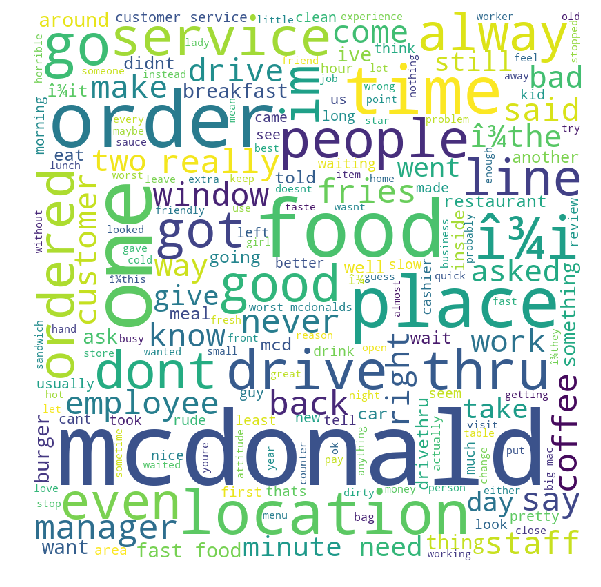

In [30]:
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in mcd['review']:
    
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Tokenizing

In [31]:
tokenized_reviews=mcd['review'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [im, huge, mcds, lover, ive, better, ones, far...
1    [terrible, customer, service, î¾i, came, 930pm...
2    [first, lost, order, actually, gave, someone, ...
3    [see, im, one, giving, 1, star, 25, star, that...
4    [well, mcdonalds, know, food, î¾this, review, ...
Name: review, dtype: object

Stemming

In [32]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
mcd['review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    im huge mcd lover ive better one far worst one...
1    terribl custom servic î¾i came 930pm stood fro...
2    first lost order actual gave someon one els to...
3         see im one give 1 star 25 star that need say
4    well mcdonald know food î¾thi review reflect s...
Name: review, dtype: object

Lemmatization

In [33]:
from textblob import Word
mcd['review'] = mcd['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
mcd['review'].head()

0    im huge mcds lover ive better one far worst on...
1    terrible customer service î¾i came 930pm stood...
2    first lost order actually gave someone one els...
3      see im one giving 1 star 25 star thats need say
4    well mcdonalds know food î¾this review reflect...
Name: review, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer


In [35]:
count_vectorizer = CountVectorizer()


In [36]:
bag_of_words = count_vectorizer.fit_transform(mcd['review'])

In [37]:
feature_names = count_vectorizer.get_feature_names()

pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,0200,040,04202014,045wtf,049,053,054,05if,0600,076,...,î¾yelp,î¾yep,î¾yes,î¾yesterday,î¾yet,î¾yetoh,î¾you,î¾your,î¾youre,î¾yours
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_vectorizer = TfidfVectorizer()

values = tfidf_vectorizer.fit_transform(mcd['review'])



# Show the Model as a pandas DataFrame

feature_names = tfidf_vectorizer.get_feature_names()

pd.DataFrame(values.toarray(), columns = feature_names)

,0200,040,04202014,045wtf,049,053,054,05if,0600,076,...,î¾yelp,î¾yep,î¾yes,î¾yesterday,î¾yet,î¾yetoh,î¾you,î¾your,î¾youre,î¾yours
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
